In [10]:
from pycaret.datasets import get_data
data= get_data("insurance")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1 

In [11]:
s= setup(data, target="charges",session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9659,3.330203e+07,5770.7909,0.8011,0.4683,0.4153
1,4503.7366,4.374648e+07,6614.1122,0.7456,0.5633,0.4217
2,3880.5528,3.179514e+07,5638.7179,0.5974,0.7645,0.4396
3,3747.6457,2.680530e+07,5177.3833,0.7762,0.5015,0.5175
4,4471.0419,4.341053e+07,6588.6670,0.6771,0.5224,0.3767
5,4182.7551,3.616633e+07,6013.8450,0.7674,0.7416,0.4320
6,4081.1022,3.919259e+07,6260.3984,0.7333,0.6434,0.4241
7,4928.1534,4.641504e+07,6812.8581,0.7448,0.5887,0.4137
8,4609.3147,4.037035e+07,6353.7670,0.7392,0.5686,0.5111
9,4665.8647,4.259679e+07,6526.6220,0.7256,0.8131,0.4802


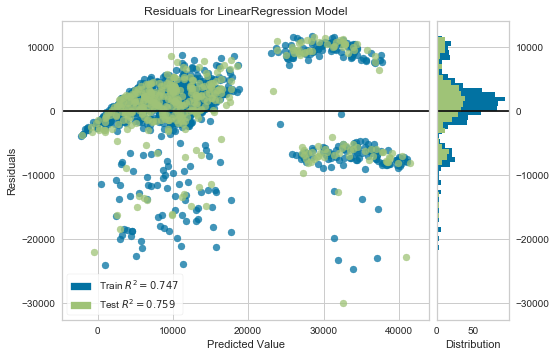

In [13]:
plot_model(lr)

# Experiment 2

In [14]:
from pycaret.regression import *

In [16]:
s2= setup(data, target="charges", session_id= 123, normalize=True, polynomial_features=True, trigonometry_features=True,
         feature_interaction= True,bin_numeric_features=["age","bmi"])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
s2[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'children_0_multiply_smoker_yes',
       'smoker_yes_multiply_bmi_5.0', 'region_southwest_multiply_smoker_yes',
       'region_southeast_multiply_age_Power2',
       'children_0_multiply_bmi_Power2', 'children_1_multiply_smoker_yes',
       'age_Power2_multiply_smoker_yes', 'smoker_yes_multiply_sex_female',
       'smoker_yes_multiply_age_Power2', 'sex_female_multiply_smoker_yes',
       'smoker_yes_multiply_bmi_Power2', 'smoker_yes_multiply_children_0

In [18]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2457.2769,1.698857e+07,4121.7190,0.8985,0.3842,0.2864
1,3470.0579,3.458672e+07,5881.0471,0.7989,0.4468,0.3407
2,2893.2774,2.160915e+07,4648.5642,0.7264,0.5824,0.3950
3,2926.7297,2.243174e+07,4736.2161,0.8127,0.5027,0.4020
4,3105.6011,2.845617e+07,5334.4322,0.7884,0.5164,0.2874
5,2993.0159,2.040309e+07,4516.9778,0.8688,0.3522,0.2734
6,2753.7277,2.324572e+07,4821.3816,0.8418,0.4101,0.3369
7,3088.5870,2.709223e+07,5205.0193,0.8510,0.4576,0.2962
8,2837.7474,2.090896e+07,4572.6322,0.8649,0.3866,0.3276
9,2973.1936,2.700317e+07,5196.4570,0.8261,0.4823,0.3326


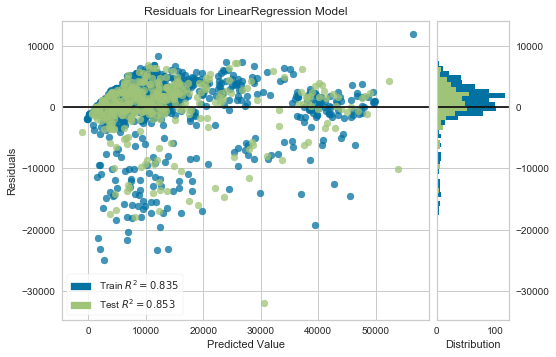

In [19]:
plot_model(lr)

In [20]:
save_model(lr,"deployement_28042020")

Transformation Pipeline and Model Succesfully Saved


In [21]:
deployement_28042020= load_model("deployement_28042020")

Transformation Pipeline and Model Sucessfully Loaded


In [22]:
deployement_28042020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions